# WHO Covid-19 Global Data Analysis

**Related information:**
- Source: https://data.who.int/dashboards/covid19/data?n=o 
- File name: WHO-COVID-19-global-data.csv
- Latest date: August 18, 2024
- Tableau Public's link: https://public.tableau.com/app/profile/yogyawan.yogyawan/viz/Prjct_Covid-19_202502/Dashb_1_3

**Welcome!**
This project is intended to explore and analyze a data from public dataset, in this case Covid-19 data from WHO. Another goal of this project is to explore and train my skills in data analytics world through Python. I aspire to become a data scientist.

There are several tasks in this project, including:
1. [Import and explore the dataset](#chapter_1)
2. [Handling missing values](#chapter_2)
    - 2.1 [Country_code](#chapter_2_1)
3. [(Add) Date columns](#chapter_3)
4. [Analyze and visualize the dataset](#chapter_4)
    - 4.1 [The year with the highest case](#chapter_4_1)
    - 4.2 [Countries with the highest case](#chapter_4_2)
    - 4.3 [The year with the highest death](#chapter_4_3)
    - 4.4 [Countries with the highest death](#chapter_4_4)
    - 4.5 [Region](#chapter_4_5)
        - 4.5.1 [Region with the highest case](#chapter_4_5_1)
        - 4.5.2 [Countries with the highest case (Region based)](#chapter_4_5_2)
        - 4.5.3 [Region with the highest death](#chapter_4_5_3)
        - 4.5.4 [Countries with the highest death (Region based)](#chapter_4_5_4)
    - 4.6 [Determine the level both cases and deaths](#chapter_4_6)
    - 4.7 [Total cases by day of year](#chapter_4_7)
    - 4.8 [A Little Exploring (Cases)](#chapter_4_8)
    - 4.9 [Total deaths by day of year](#chapter_4_9)
    - 4.10 [A Little Exploring (Deaths)](#chapter_4_10)
5. [Correlation](#chapter_5)
    - 5.1 [Correlation between New_cases and New_deaths](#chapter_5_1)
        - 5.1.1 [2021](#chapter_5_1_1)
        - 5.1.2 [2022](#chapter_5_1_2)
        - 5.1.3 [2023](#chapter_5_1_3)
        - 5.1.4 [The whole dataframe](#chapter_5_1_4)
6. [Hypothesis testing](#chapter_6)
7. [Summary](#chapter_7)

<a id="chapter_1"></a>
## 1. Import and explore the dataset

First, import a relevant packages and libraries.

In [1]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [2]:
# Read csv file: WHO-COVID-19-global-data.csv
df = pd.read_csv('WHO-COVID-19-global-data.csv')

In [3]:
# Check the data first
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2024-08-18,BD,Bangladesh,SEARO,1.0,2051372,0.0,29499
1,2024-08-18,CA,Canada,AMRO,NaN,4819055,NaN,55282
2,2024-08-18,CK,Cook Islands,WPRO,NaN,7375,NaN,2
3,2024-08-18,CO,Colombia,AMRO,NaN,6392971,NaN,142727
4,2024-08-18,BB,Barbados,AMRO,NaN,108716,NaN,593


Check on the dataset shape to determine number of columns and rows.

In [4]:
df.shape

(405360, 8)

It has 405360 rows and 8 columns by the time this file is downloaded.

Summarize the central tendency, dispersion and shape of a dataset’s distribution with describe()

In [5]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.056250e+05,4.053600e+05,206542.000000,4.053600e+05
mean,3.773895e+03,1.797001e+06,34.180031,2.004908e+04
std,4.911307e+04,7.809850e+06,209.955946,8.196270e+04
min,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,3.000000e+00,4.285000e+03,0.000000,2.800000e+01
50%,6.300000e+01,4.627500e+04,0.000000,5.740000e+02
75%,6.990000e+02,5.257178e+05,8.000000,7.029000e+03
max,6.966046e+06,1.034368e+08,44047.000000,1.195262e+06


Print a concise summary of a DataFrame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405360 entries, 0 to 405359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      405360 non-null  object 
 1   Country_code       403671 non-null  object 
 2   Country            405360 non-null  object 
 3   WHO_region         405360 non-null  object 
 4   New_cases          205625 non-null  float64
 5   Cumulative_cases   405360 non-null  int64  
 6   New_deaths         206542 non-null  float64
 7   Cumulative_deaths  405360 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 24.7+ MB


<a id="chapter_2"></a>
## 2. Handling missing values

In this section, I want to find any missing values in the dataset. And, it appears that there are 3 columns that have missing values. But, the only real missing values is Country_code. That means both of New_cases and New_deaths have no record reported at were given time.

<a id="chapter_2_1"></a>
### 2.1 Country_code

In [7]:
df.isna().sum()

Date_reported             0
Country_code           1689
Country                   0
WHO_region                0
New_cases            199735
Cumulative_cases          0
New_deaths           198818
Cumulative_deaths         0
dtype: int64

There are 3 columns that have missing values in one of them which are Country_code, New_cases and New_deaths.

In [8]:
# Create a mask dataframe to hold a record with missing values
mask = df.isna()
mask

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,True,False
2,False,False,False,False,True,False,True,False
3,False,False,False,False,True,False,True,False
4,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...
405355,False,False,False,False,True,False,True,False
405356,False,False,False,False,True,False,True,False
405357,False,False,False,False,True,False,True,False
405358,False,False,False,False,True,False,True,False


In [9]:
# Check the mask dataframe
mask = mask.any(axis=1)
mask.head()

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [10]:
df_missing_rows = df[mask]
df_missing_rows

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,2024-08-18,CA,Canada,AMRO,NaN,4819055,NaN,55282
2,2024-08-18,CK,Cook Islands,WPRO,NaN,7375,NaN,2
3,2024-08-18,CO,Colombia,AMRO,NaN,6392971,NaN,142727
4,2024-08-18,BB,Barbados,AMRO,NaN,108716,NaN,593
5,2024-08-18,AI,Anguilla,AMRO,NaN,3904,NaN,12
...,...,...,...,...,...,...,...,...
405355,2020-01-04,UA,Ukraine,EURO,NaN,0,NaN,0
405356,2020-01-04,UY,Uruguay,AMRO,NaN,0,NaN,0
405357,2020-01-04,YE,Yemen,EMRO,NaN,0,NaN,0
405358,2020-01-04,SD,Sudan,EMRO,NaN,0,NaN,0


In [11]:
# Filter any missing country code into a new dataframe
mask_country_code_missing = df['Country_code'].isna()
mask_country_code_missing.head()

0    False
1    False
2    False
3    False
4    False
Name: Country_code, dtype: bool

In [12]:
df_country_code_missing = df[mask_country_code_missing]
df_country_code_missing

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
197,2024-08-18,NaN,Namibia,AFRO,NaN,172549,NaN,4108
279,2024-08-17,NaN,Namibia,AFRO,NaN,172549,NaN,4108
673,2024-08-16,NaN,Namibia,AFRO,NaN,172549,NaN,4108
764,2024-08-15,NaN,Namibia,AFRO,NaN,172549,NaN,4108
1155,2024-08-14,NaN,Namibia,AFRO,NaN,172549,NaN,4108
...,...,...,...,...,...,...,...,...
404362,2020-01-08,NaN,Namibia,AFRO,NaN,0,NaN,0
404441,2020-01-07,NaN,Namibia,AFRO,NaN,0,NaN,0
404842,2020-01-06,NaN,Namibia,AFRO,NaN,0,NaN,0
404920,2020-01-05,NaN,Namibia,AFRO,NaN,0,NaN,0


In [13]:
a = df_country_code_missing['Country'].unique()
print(sorted(a))

['Namibia']


Only Namibia in the dataset that missing its country code.

In [14]:
df_country_code_missing.shape

(1689, 8)

In [15]:
v_check_namibia_first = df['Country'] == 'Namibia'
v_check_namibia_first.sum()

1689

It was indeed the only missing country code is Namibia.

Check the other country codes.

In [16]:
df.groupby(['Country_code'])['Country_code'].size().reset_index(name='Count')

,Country_code,Count
0,AD,1689
1,AE,1689
2,AF,1689
3,AG,1689
4,AI,1689
...,...,...
234,YE,1689
235,YT,1689
236,ZA,1689
237,ZM,1689


Check if there is a country code with the name of 'NB'.

In [17]:
v_check_nb_first = df['Country_code'] == 'NB'
v_check_nb_first.sum()

0

No country with the code of 'NB'. Let's replace the missing value of Namibia with 'NB'.

In [18]:
#df['Country_code'].fillna({'Country_code':'NB'}, inplace=True)

In [19]:
df['Country_code'].fillna('NB', inplace=True)

C:\Users\yogyawan.iskandar\AppData\Local\Temp\ipykernel_13540\850119448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country_code'].fillna('NB', inplace=True)


In [20]:
df.isna().sum()

Date_reported             0
Country_code              0
Country                   0
WHO_region                0
New_cases            199735
Cumulative_cases          0
New_deaths           198818
Cumulative_deaths         0
dtype: int64

Now, the Country_code's column no longer has missing values in it.

<a id="chapter_3"></a>
## 3. (Add) Date columns

In this section, I want to add multiple date columns in order to help me analyze and visualize the dataset.

Check Date_reported data type.

In [21]:
df['Date_reported'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 405360 entries, 0 to 405359
Series name: Date_reported
Non-Null Count   Dtype 
--------------   ----- 
405360 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB


It was object, now change to datetime.

In [22]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
df['Date_reported'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 405360 entries, 0 to 405359
Series name: Date_reported
Non-Null Count   Dtype         
--------------   -----         
405360 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.1 MB


In [23]:
df['Date_reported'].head()

0   2024-08-18
1   2024-08-18
2   2024-08-18
3   2024-08-18
4   2024-08-18
Name: Date_reported, dtype: datetime64[ns]

In [24]:
# Dr = Date_reported
df['Dr_year'] = df['Date_reported'].dt.year
df['Dr_month'] = df['Date_reported'].dt.month
df['Dr_month_name'] = df['Date_reported'].dt.month_name()
df['Dr_month_name_slice'] = df['Date_reported'].dt.month_name().str.slice(stop=3)
df['Dr_day'] = df['Date_reported'].dt.day
df['Dr_day_name'] = df['Date_reported'].dt.day_name()
df['Dr_dayofyear'] = df['Date_reported'].dt.dayofyear
df['Dr_week'] = df['Date_reported'].dt.strftime('%Y-W%V')
df['Dr_quarter'] = df['Date_reported'].dt.to_period('Q').dt.strftime('%Y-Q%q')

df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Dr_year,Dr_month,Dr_month_name,Dr_month_name_slice,Dr_day,Dr_day_name,Dr_dayofyear,Dr_week,Dr_quarter
0,2024-08-18,BD,Bangladesh,SEARO,1.0,2051372,0.0,29499,2024,8,August,Aug,18,Sunday,231,2024-W33,2024-Q3
1,2024-08-18,CA,Canada,AMRO,NaN,4819055,NaN,55282,2024,8,August,Aug,18,Sunday,231,2024-W33,2024-Q3
2,2024-08-18,CK,Cook Islands,WPRO,NaN,7375,NaN,2,2024,8,August,Aug,18,Sunday,231,2024-W33,2024-Q3
3,2024-08-18,CO,Colombia,AMRO,NaN,6392971,NaN,142727,2024,8,August,Aug,18,Sunday,231,2024-W33,2024-Q3
4,2024-08-18,BB,Barbados,AMRO,NaN,108716,NaN,593,2024,8,August,Aug,18,Sunday,231,2024-W33,2024-Q3


In [25]:
# Check the other country, for example Indonesia
df[df['Country'] == 'Indonesia'].head()
# 6829515.0

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Dr_year,Dr_month,Dr_month_name,Dr_month_name_slice,Dr_day,Dr_day_name,Dr_dayofyear,Dr_week,Dr_quarter
112,2024-08-18,ID,Indonesia,SEARO,NaN,6829515,NaN,162059,2024,8,August,Aug,18,Sunday,231,2024-W33,2024-Q3
373,2024-08-17,ID,Indonesia,SEARO,2.0,6829515,0.0,162059,2024,8,August,Aug,17,Saturday,230,2024-W33,2024-Q3
586,2024-08-16,ID,Indonesia,SEARO,3.0,6829513,0.0,162059,2024,8,August,Aug,16,Friday,229,2024-W33,2024-Q3
848,2024-08-15,ID,Indonesia,SEARO,3.0,6829510,0.0,162059,2024,8,August,Aug,15,Thursday,228,2024-W33,2024-Q3
1069,2024-08-14,ID,Indonesia,SEARO,1.0,6829507,0.0,162059,2024,8,August,Aug,14,Wednesday,227,2024-W33,2024-Q3


In this part, I just want to check the new and the cumulative. As you can see, if there is a new case or death, it will add to the cumulative one.

<a id="chapter_4"></a>
## 4. Analyze and visualize the dataset

<a id="chapter_4_1"></a>
### 4.1 The year with the highest case

In [26]:
# Create a new dataframe to filter a grouped dataframe by year, sum the new cases
df_year_cases = df.groupby(by=['Dr_year'])['New_cases'].sum().reset_index(name='Count')
df_year_cases['Count_formatted'] = df_year_cases['Count'].div(1000000).round(1).astype(str) + 'M'
df_year_cases['Dr_year'] = df_year_cases['Dr_year'].astype(str)
df_year_cases

,Dr_year,Count,Count_formatted
0,2020,82335574.0,82.3M
1,2021,203111242.0,203.1M
2,2022,444029532.0,444.0M
3,2023,44327923.0,44.3M
4,2024,2202866.0,2.2M


In [27]:
# In order to this function run smoothly, one data type must be string
def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

def addlabels_1(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        ax.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

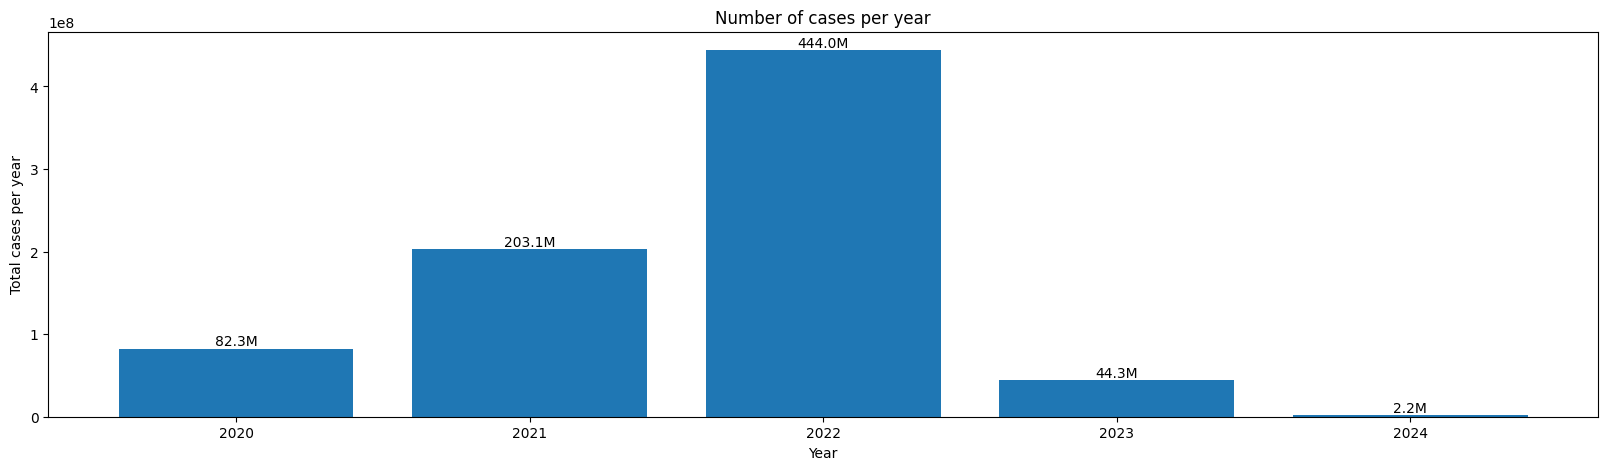

In [28]:
plt.figure(figsize = (20, 5)) # Increase output size.
plt.bar(x = df_year_cases['Dr_year'], height = df_year_cases['Count'])
addlabels(df_year_cases['Dr_year'], df_year_cases['Count'], df_year_cases['Count_formatted'])
plt.plot()
plt.xlabel("Year")
plt.ylabel("Total cases per year")
plt.title("Number of cases per year")
#plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size.

plt.show()

The year **2022** is the highest cases of Covid-19. What countries have the highest cases in 2022?

<a id="chapter_4_2"></a>
### 4.2 Countries with the highest case

In [29]:
# Create a new dataframe to filter a grouped dataframe by year and country, sum the new cases
df_y_c_c = df.groupby(by=['Dr_year','Country'])['New_cases'].sum().reset_index(name='Count')
df_y_c_c['Count_formatted'] = df_y_c_c['Count'].div(1000000).round(1).astype(str) + 'M'
df_y_c_c['Dr_year'] = df_y_c_c['Dr_year'].astype(str)
df_y_c_c_2022 = df_y_c_c[df_y_c_c['Dr_year'] == '2022'].sort_values(by='Count', ascending=False).reset_index(drop=True)
df_y_c_c_2022.head(10)

,Dr_year,Country,Count,Count_formatted
0,2022,China,84792971.0,84.8M
1,2022,United States of America,45877410.0,45.9M
2,2022,Germany,30227893.0,30.2M
3,2022,France,29279621.0,29.3M
4,2022,Republic of Korea,28424023.0,28.4M
5,2022,Japan,27371282.0,27.4M
6,2022,Italy,19187010.0,19.2M
7,2022,Brazil,14038581.0,14.0M
8,2022,Russian Federation,11298527.0,11.3M
9,2022,United Kingdom of Great Britain and Northern I...,10752848.0,10.8M


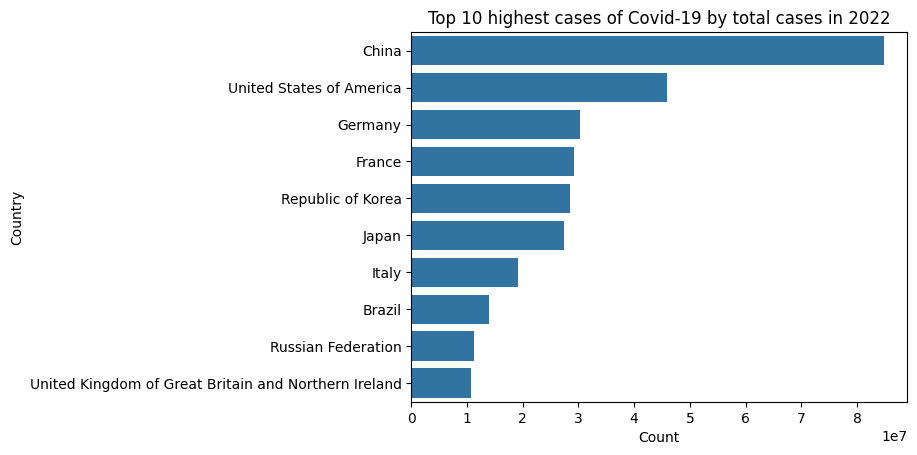

In [30]:
sns.barplot(data=df_y_c_c_2022.head(10),
            y='Country',
            x='Count')
plt.title('Top 10 highest cases of Covid-19 by total cases in 2022')
plt.show();

<a id="chapter_4_3"></a>
### 4.3 The year with the highest death

In [31]:
# Create a new dataframe to filter a grouped dataframe by year, sum the new deaths
df_year_deaths = df.groupby(by=['Dr_year'])['New_deaths'].sum().reset_index(name='Count')
df_year_deaths['Count_formatted'] = df_year_deaths['Count'].div(1000000).round(1).astype(str) + 'M'
df_year_deaths['Dr_year'] = df_year_deaths['Dr_year'].astype(str)
df_year_deaths

,Dr_year,Count,Count_formatted
0,2020,1936752.0,1.9M
1,2021,3537358.0,3.5M
2,2022,1246156.0,1.2M
3,2023,294232.0,0.3M
4,2024,45114.0,0.0M


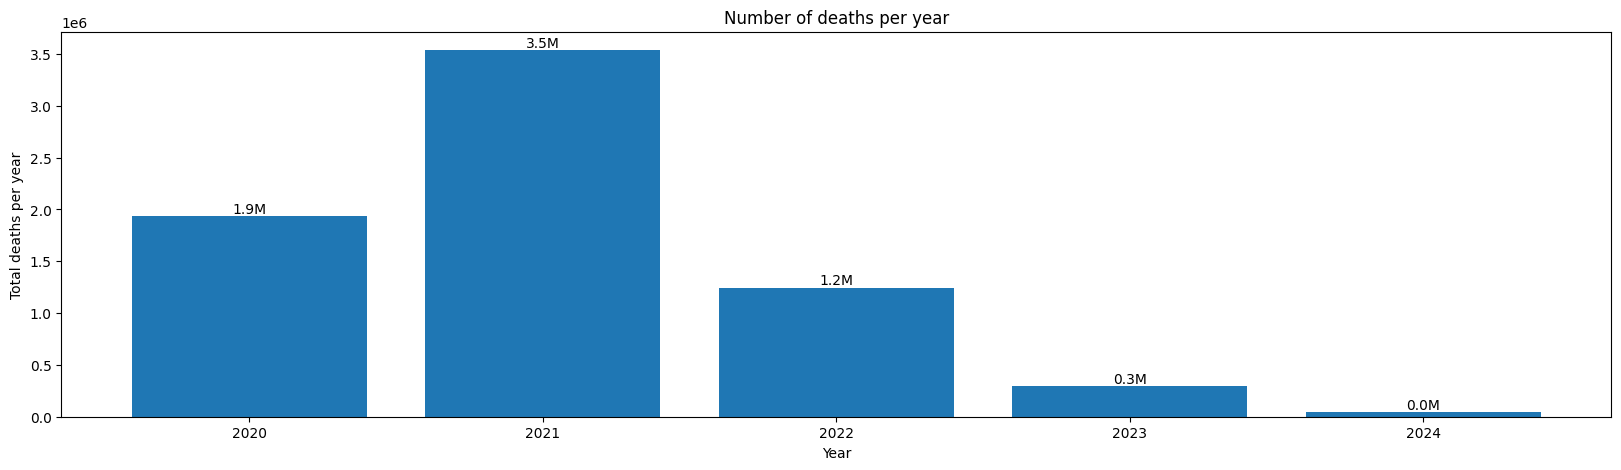

In [32]:
plt.figure(figsize = (20, 5)) # Increase output size.
plt.bar(x = df_year_deaths['Dr_year'], height = df_year_deaths['Count'])
addlabels(df_year_deaths['Dr_year'], df_year_deaths['Count'], df_year_deaths['Count_formatted'])
plt.plot()
plt.xlabel("Year")
plt.ylabel("Total deaths per year")
plt.title("Number of deaths per year")
#plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size.

plt.show()

The year **2021** is the highest deaths of Covid-19. What countries have the highest deaths in 2022?

<a id="chapter_4_4"></a>
### 4.4 Countries with the highest death

In [33]:
# Create a new dataframe to filter a grouped dataframe by year and country, sum the new deaths
df_y_d_c = df.groupby(by=['Dr_year','Country'])['New_deaths'].sum().reset_index(name='Count')
df_y_d_c['Count_formatted'] = df_y_d_c['Count'].div(1000000).round(1).astype(str) + 'M'
df_y_d_c['Dr_year'] = df_y_d_c['Dr_year'].astype(str)
df_y_d_c_2021 = df_y_d_c[df_y_d_c['Dr_year'] == '2021'].sort_values(by='Count', ascending=False).reset_index(drop=True)
df_y_d_c_2021.head(10)

,Dr_year,Country,Count,Count_formatted
0,2021,United States of America,467051.0,0.5M
1,2021,Brazil,426136.0,0.4M
2,2021,India,332342.0,0.3M
3,2021,Russian Federation,251841.0,0.3M
4,2021,Mexico,156199.0,0.2M
5,2021,Indonesia,121956.0,0.1M
6,2021,Peru,109518.0,0.1M
7,2021,Colombia,87246.0,0.1M
8,2021,United Kingdom of Great Britain and Northern I...,83496.0,0.1M
9,2021,Ukraine,77255.0,0.1M


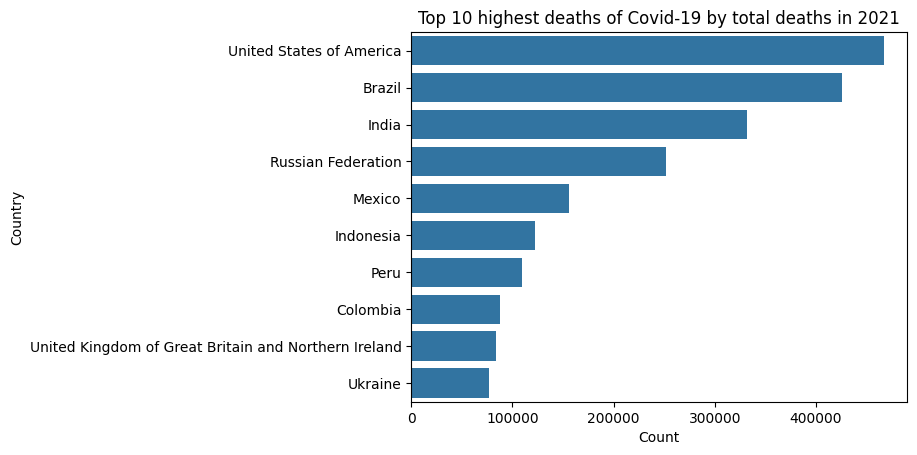

In [34]:
sns.barplot(data=df_y_d_c_2021.head(10),
            y='Country',
            x='Count')
plt.title('Top 10 highest deaths of Covid-19 by total deaths in 2021')
plt.show();

<a id="chapter_4_5"></a>
### 4.5 Region

In [35]:
# Dictionary of region according WHO
# Source: https://en.wikipedia.org/wiki/List_of_WHO_regions
region_dict = {
    'EURO': 'European',
    'AMRO': 'Americas',
    'SEARO': 'South-East Asian',
    'EMRO': 'Eastern Mediterranean',
    'AFRO': 'African',
    'WPRO': 'Western Pacific',
    'OTHER': 'OTHER'
}

<a id="chapter_4_5_1"></a>
#### 4.5.1 Region with the highest case

In [36]:
# Create a new dataframe to filter a grouped dataframe by region, sum the new cases
df_reg_cases = df.groupby(['WHO_region'])['New_cases'].sum().reset_index(name='Count')
df_reg_cases['Count_formatted'] = df_reg_cases['Count'].div(1000000).round(1).astype(str) + 'M'
# Add a new column of region name according to dictionary
df_reg_cases['Reg_name'] = df_reg_cases['WHO_region'].replace(region_dict)
df_reg_cases.sort_values(by=['Count'], ascending=False)

,WHO_region,Count,Count_formatted,Reg_name
3,EURO,279839772.0,279.8M,European
6,WPRO,208556812.0,208.6M,Western Pacific
1,AMRO,193293860.0,193.3M,Americas
5,SEARO,61315364.0,61.3M,South-East Asian
2,EMRO,23417911.0,23.4M,Eastern Mediterranean
0,AFRO,9582654.0,9.6M,African
4,OTHER,764.0,0.0M,OTHER


C:\Users\yogyawan.iskandar\AppData\Local\Temp\ipykernel_13540\534965839.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_reg_cases['Reg_name'])


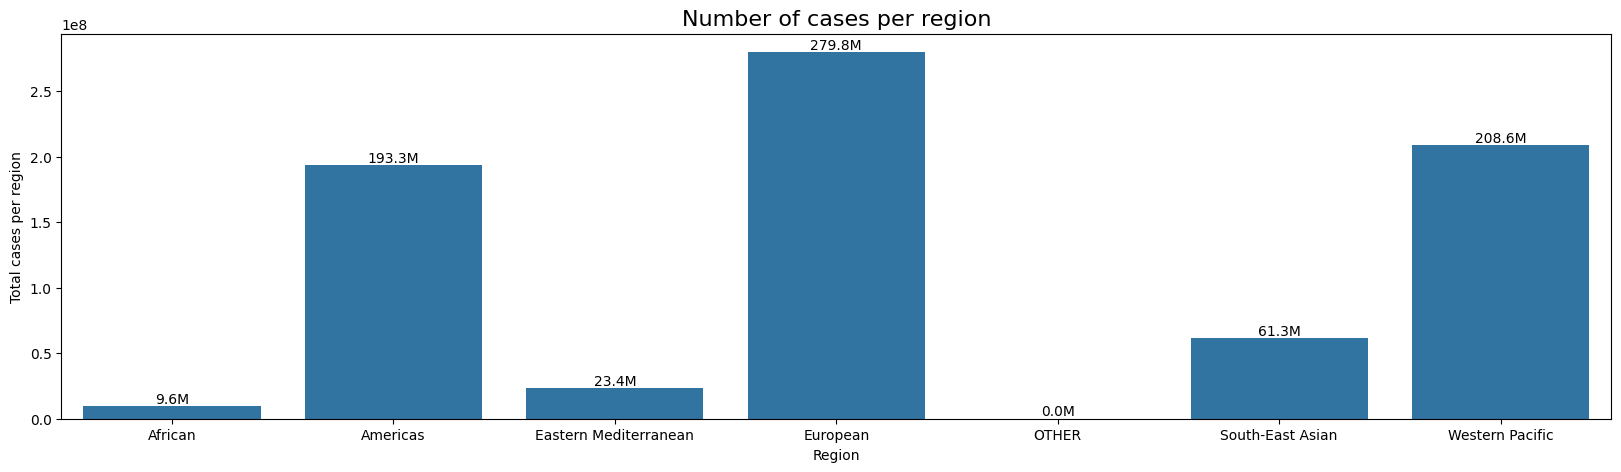

In [37]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x=df_reg_cases.index, y=df_reg_cases['Count'])
addlabels_1(df_reg_cases['Reg_name'], df_reg_cases['Count'], df_reg_cases['Count_formatted'])
ax.set_xticklabels(df_reg_cases['Reg_name'])
ax.set_xlabel('Region')
ax.set_ylabel('Total cases per region')
plt.title('Number of cases per region', fontsize=16);

EURO has the highest cases of Covid-19. What countries have the highest cases in EURO?

<a id="chapter_4_5_2"></a>
#### 4.5.2 Countries with the highest case (Region based)

In [38]:
# Create a new dataframe to filter a grouped dataframe by region and country, sum the new cases
df_r_c_c = df.groupby(by=['WHO_region','Country'])['New_cases'].sum().reset_index(name='Count')
df_r_c_c['Count_formatted'] = df_r_c_c['Count'].div(1000000).round(1).astype(str) + 'M'
df_r_c_c_euro = df_r_c_c[df_r_c_c['WHO_region'] == 'EURO'].sort_values(by='Count', ascending=False).reset_index(drop=True)
df_r_c_c_euro.head(10)

,WHO_region,Country,Count,Count_formatted
0,EURO,France,38997490.0,39.0M
1,EURO,Germany,38437756.0,38.4M
2,EURO,Italy,26822157.0,26.8M
3,EURO,United Kingdom of Great Britain and Northern I...,24978534.0,25.0M
4,EURO,Russian Federation,24291925.0,24.3M
5,EURO,Türkiye,17004722.0,17.0M
6,EURO,Spain,13980340.0,14.0M
7,EURO,Netherlands,8640796.0,8.6M
8,EURO,Poland,6678236.0,6.7M
9,EURO,Austria,6082479.0,6.1M


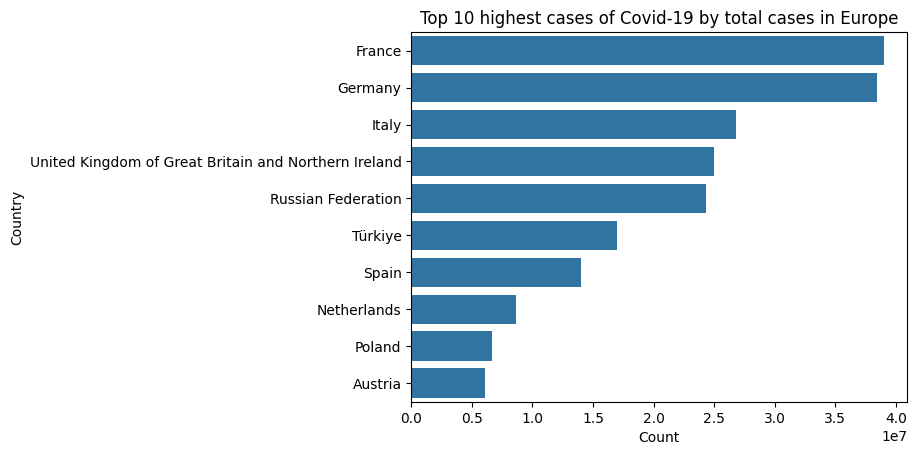

In [39]:
sns.barplot(data=df_r_c_c_euro.head(10),
            y='Country',
            x='Count')
plt.title('Top 10 highest cases of Covid-19 by total cases in Europe')
plt.show();

<a id="chapter_4_5_3"></a>
#### 4.5.3 Region with the highest death

In [40]:
# Create a new dataframe to filter a grouped dataframe by region, sum the new deaths
df_reg_deaths = df.groupby(['WHO_region'])['New_deaths'].sum().reset_index(name='Count')
df_reg_deaths['Count_formatted'] = df_reg_deaths['Count'].div(1000000).round(1).astype(str) + 'M'
# Add a new column of region name according to dictionary
df_reg_deaths['Reg_name'] = df_reg_deaths['WHO_region'].replace(region_dict)
df_reg_deaths.sort_values(by=['Count'], ascending=False)

,WHO_region,Count,Count_formatted,Reg_name
1,AMRO,3027525.0,3.0M,Americas
3,EURO,2274365.0,2.3M,European
5,SEARO,808814.0,0.8M,South-East Asian
6,WPRO,421392.0,0.4M,Western Pacific
2,EMRO,351975.0,0.4M,Eastern Mediterranean
0,AFRO,175528.0,0.2M,African
4,OTHER,13.0,0.0M,OTHER


C:\Users\yogyawan.iskandar\AppData\Local\Temp\ipykernel_13540\3244093488.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_reg_deaths['Reg_name'])


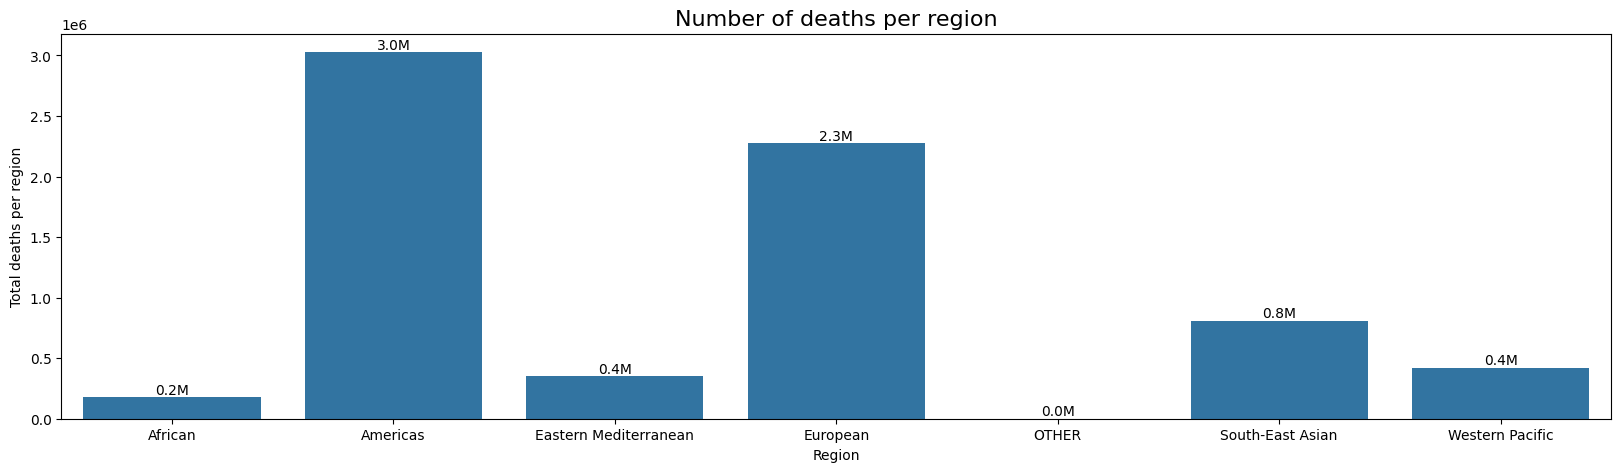

In [41]:
plt.figure(figsize=(20,5))
#ax = sns.barplot(x=df_reg_deaths.index, y=df_reg_deaths['Count'])
ax = sns.barplot(x=df_reg_deaths.index, y=df_reg_deaths['Count'])
addlabels_1(df_reg_deaths['Reg_name'], df_reg_deaths['Count'], df_reg_deaths['Count_formatted'])
ax.set_xticklabels(df_reg_deaths['Reg_name'])
ax.set_xlabel('Region')
ax.set_ylabel('Total deaths per region')
plt.title('Number of deaths per region', fontsize=16);

Americas has the highest deaths of Covid-19. What countries have the highest deaths in Americas?

<a id="chapter_4_5_4"></a>
#### 4.5.4 Countries with the highest death (Region based)

In [42]:
df_r_d_c = df.groupby(by=['WHO_region','Country'])['New_deaths'].sum().reset_index(name='Count')
df_r_d_c['Count_formatted'] = df_r_d_c['Count'].div(1000000).round(1).astype(str) + 'M'
df_r_d_c_amro = df_r_d_c[df_r_d_c['WHO_region'] == 'AMRO'].sort_values(by='Count', ascending=False).reset_index(drop=True)
df_r_d_c_amro.head(10)

,WHO_region,Country,Count,Count_formatted
0,AMRO,United States of America,1195262.0,1.2M
1,AMRO,Brazil,702116.0,0.7M
2,AMRO,Mexico,334621.0,0.3M
3,AMRO,Peru,220975.0,0.2M
4,AMRO,Colombia,142727.0,0.1M
5,AMRO,Argentina,130664.0,0.1M
6,AMRO,Chile,62737.0,0.1M
7,AMRO,Canada,55282.0,0.1M
8,AMRO,Ecuador,36050.0,0.0M
9,AMRO,Bolivia (Plurinational State of),22387.0,0.0M


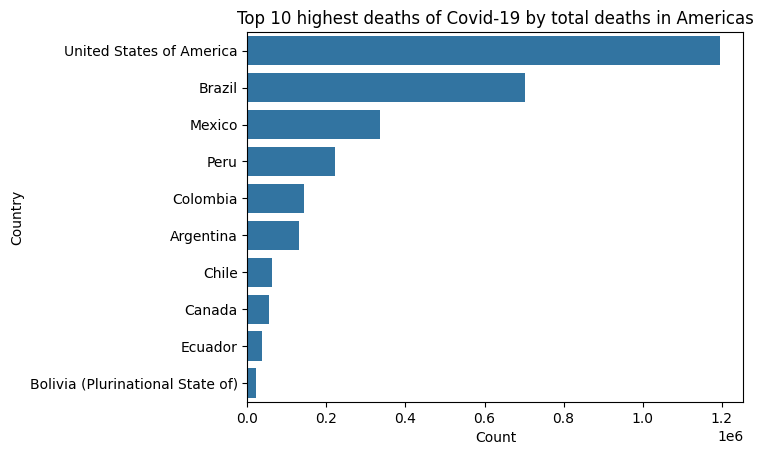

In [43]:
sns.barplot(data=df_r_d_c_amro.head(10),
            y='Country',
            x='Count')
plt.title('Top 10 highest deaths of Covid-19 by total deaths in Americas')
plt.show();

<a id="chapter_4_6"></a>
### 4.6 Determine the level both cases and deaths

In [44]:
df_year_month_cases = df.groupby(by=['Dr_year','Dr_month_name_slice'])['New_cases'].sum().reset_index(name='Count')
df_year_month_deaths = df.groupby(by=['Dr_year','Dr_month_name_slice'])['New_deaths'].sum().reset_index(name='Count')

# Create categorical designations
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Encode `month` column as categoricals 
df_year_month_cases['Dr_month_name_slice'] = pd.Categorical(
    df_year_month_cases['Dr_month_name_slice'],
    categories=months,
    ordered=True
)

# Create a new df of month, year, total cases and deaths
df_year_month_cases = df_year_month_cases.groupby(['Dr_year', 'Dr_month_name_slice']).sum(numeric_only=True).reset_index()
df_year_month_deaths = df_year_month_deaths.groupby(['Dr_year', 'Dr_month_name_slice']).sum(numeric_only=True).reset_index()

C:\Users\yogyawan.iskandar\AppData\Local\Temp\ipykernel_13540\616949198.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_year_month_cases = df_year_month_cases.groupby(['Dr_year', 'Dr_month_name_slice']).sum(numeric_only=True).reset_index()


#### 4.6.1 Level of cases

In [45]:
df_year_month_cases['Cases_level'] = pd.qcut(df_year_month_cases['Count'],
                                             3,
                                             labels = ['Low', 'Moderate', 'High'])
df_year_month_cases['Cases_level_code'] = df_year_month_cases['Cases_level'].cat.codes

df_year_month_cases

,Dr_year,Dr_month_name_slice,Count,Cases_level,Cases_level_code
0,2020,Jan,9843.0,Low,0
1,2020,Feb,75364.0,Low,0
2,2020,Mar,697567.0,Low,0
3,2020,Apr,2222868.0,Moderate,1
4,2020,May,2886397.0,Moderate,1
5,2020,Jun,4268400.0,Moderate,1
6,2020,Jul,6973974.0,Moderate,1
7,2020,Aug,8287922.0,Moderate,1
8,2020,Sep,8625997.0,Moderate,1
9,2020,Oct,11771218.0,Moderate,1


Make sure the count of the overall data by year are the same.

In [46]:
count_by_year = df.groupby(by=df['Dr_year'].astype(int)).count()
count_by_year

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Dr_year,Dr_month,Dr_month_name,Dr_month_name_slice,Dr_day,Dr_day_name,Dr_dayofyear,Dr_week,Dr_quarter
Dr_year,,,,,,,,,,,,,,,,,
2020,87120,87120,87120,87120,53447,87120,53703,87120,87120,87120,87120,87120,87120,87120,87120,87120,87120
2021,87600,87600,87600,87600,66230,87600,66595,87600,87600,87600,87600,87600,87600,87600,87600,87600,87600
2022,87600,87600,87600,87600,53551,87600,53723,87600,87600,87600,87600,87600,87600,87600,87600,87600,87600
2023,87600,87600,87600,87600,27634,87600,27721,87600,87600,87600,87600,87600,87600,87600,87600,87600,87600
2024,55440,55440,55440,55440,4763,55440,4800,55440,55440,55440,55440,55440,55440,55440,55440,55440,55440


Only the year 2021, 2022 and 2023 have the same amount of reported record which is 87600 data.

In [47]:
selected_years = [2021, 2022, 2023]
df_year_month_cases_plot = df_year_month_cases[df_year_month_cases['Dr_year'].isin(selected_years)]
df_year_month_cases_plot = df_year_month_cases_plot.pivot(
    index='Dr_year',
    columns='Dr_month_name_slice',
    values='Cases_level_code'
)
df_year_month_cases_plot

Dr_month_name_slice,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Dr_year,,,,,,,,,,,,
2021,2,1,1,2,2,1,2,2,2,1,2,2
2022,2,2,2,2,2,2,2,2,1,1,1,2
2023,2,1,1,1,1,0,0,1,0,0,0,1


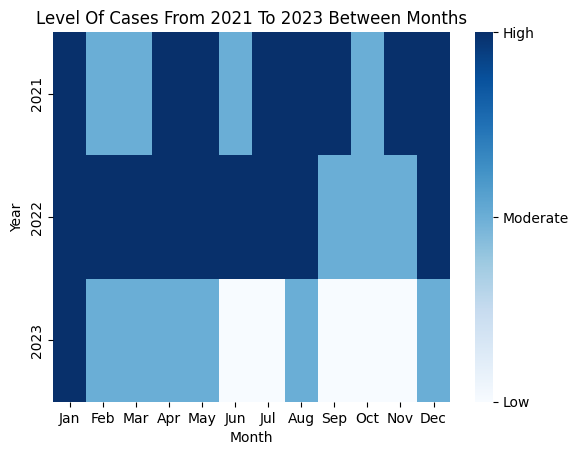

In [48]:
ax = sns.heatmap(df_year_month_cases_plot, cmap = 'Blues')
ax.set(xlabel='Month', ylabel='Year', title='Level Of Cases From 2021 To 2023 Between Months')
colorbar = ax.collections[0].colorbar
#colorbar.set_ylabel = 'wew'
colorbar.set_ticks([0, 1, 2])
colorbar.set_ticklabels(['Low', 'Moderate', 'High'])
plt.show()

#### 4.6.2 Level of deaths

In [49]:
df_year_month_deaths['Deaths_level'] = pd.qcut(df_year_month_deaths['Count'],
                                             3,
                                             labels = ['Low', 'Moderate', 'High'])
df_year_month_deaths['Deaths_level_code'] = df_year_month_deaths['Deaths_level'].cat.codes

df_year_month_deaths

,Dr_year,Dr_month_name_slice,Count,Deaths_level,Deaths_level_code
0,2020,Apr,193544.0,High,2
1,2020,Aug,193839.0,High,2
2,2020,Dec,360675.0,High,2
3,2020,Feb,2717.0,Low,0
4,2020,Jan,219.0,Low,0
5,2020,Jul,184438.0,High,2
6,2020,Jun,153673.0,Moderate,1
7,2020,Mar,40666.0,Moderate,1
8,2020,May,164357.0,Moderate,1
9,2020,Nov,297001.0,High,2


In [50]:
df_year_month_deaths_plot = df_year_month_deaths[df_year_month_deaths['Dr_year'].isin(selected_years)]
df_year_month_deaths_plot = df_year_month_deaths_plot.pivot(
    index='Dr_year',
    columns='Dr_month_name_slice',
    values='Deaths_level_code'
)
df_year_month_deaths_plot

Dr_month_name_slice,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Dr_year,,,,,,,,,,,,
2021,2,2,2,2,2,2,2,2,2,2,2,2
2022,1,1,1,2,2,1,1,1,1,1,1,1
2023,0,0,0,1,1,0,0,1,0,0,0,0


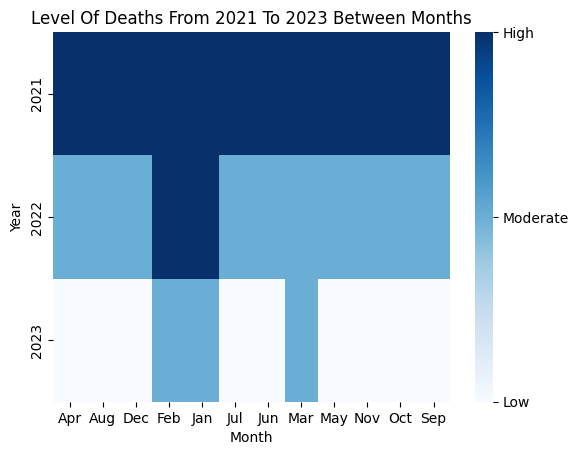

In [51]:
ax = sns.heatmap(df_year_month_deaths_plot, cmap = 'Blues')
ax.set(xlabel='Month', ylabel='Year', title='Level Of Deaths From 2021 To 2023 Between Months')
colorbar = ax.collections[0].colorbar
#colorbar.set_ylabel = 'wew'
colorbar.set_ticks([0, 1, 2])
colorbar.set_ticklabels(['Low', 'Moderate', 'High'])
plt.show()

<Axes: ylabel='New_cases'>

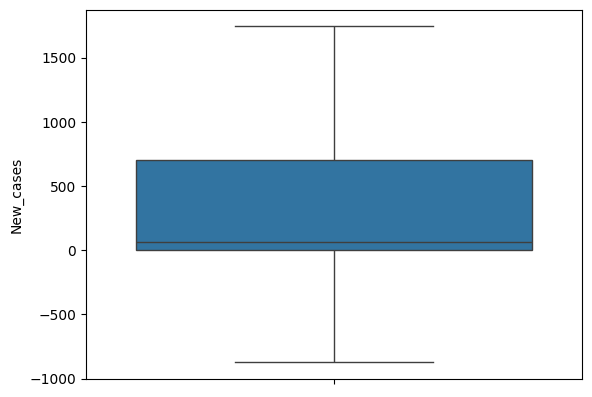

In [52]:
sns.boxplot(y = df['New_cases'], showfliers = False)

According to WHO, the year of highest cases of Covid-19 happened in **2022**. While the year of highest deaths happened in **2021**.

<a id="chapter_4_7"></a>
### 4.7 Total cases by day of year

In [53]:
# Case
df_2022 = df[df['Dr_year'] == 2022]
df_2022.head(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Dr_year,Dr_month,Dr_month_name,Dr_month_name_slice,Dr_day,Dr_day_name,Dr_dayofyear,Dr_week,Dr_quarter
143040,2022-12-31,AZ,Azerbaijan,EURO,62.0,826311,0.0,10008,2022,12,December,Dec,31,Saturday,365,2022-W52,2022-Q4
143041,2022-12-31,BB,Barbados,AMRO,NaN,105515,NaN,568,2022,12,December,Dec,31,Saturday,365,2022-W52,2022-Q4
143042,2022-12-31,BD,Bangladesh,SEARO,23.0,2037125,1.0,29440,2022,12,December,Dec,31,Saturday,365,2022-W52,2022-Q4


In [54]:
df_2022.shape

(87600, 17)

In [55]:
df_2022_doy_c = df_2022.groupby(by=['Dr_dayofyear'])['New_cases'].sum().reset_index(name='Count')
df_2022_doy_c['Count_formatted'] = df_2022_doy_c['Count'].div(1000000).round(1).astype(str) + 'M'
df_2022_doy_c_sorted = df_2022_doy_c.sort_values(by='Count', ascending=False).reset_index(drop=True)
df_2022_doy_c_sorted_20 = df_2022_doy_c_sorted.head(20)
df_2022_doy_c_sorted_20

,Dr_dayofyear,Count,Count_formatted
0,30,8401963.0,8.4M
1,23,8346573.0,8.3M
2,357,7852910.0,7.9M
3,16,7197214.0,7.2M
4,37,7078277.0,7.1M
5,356,6843176.0,6.8M
6,358,6727761.0,6.7M
7,359,6666660.0,6.7M
8,9,6440071.0,6.4M
9,355,6336742.0,6.3M


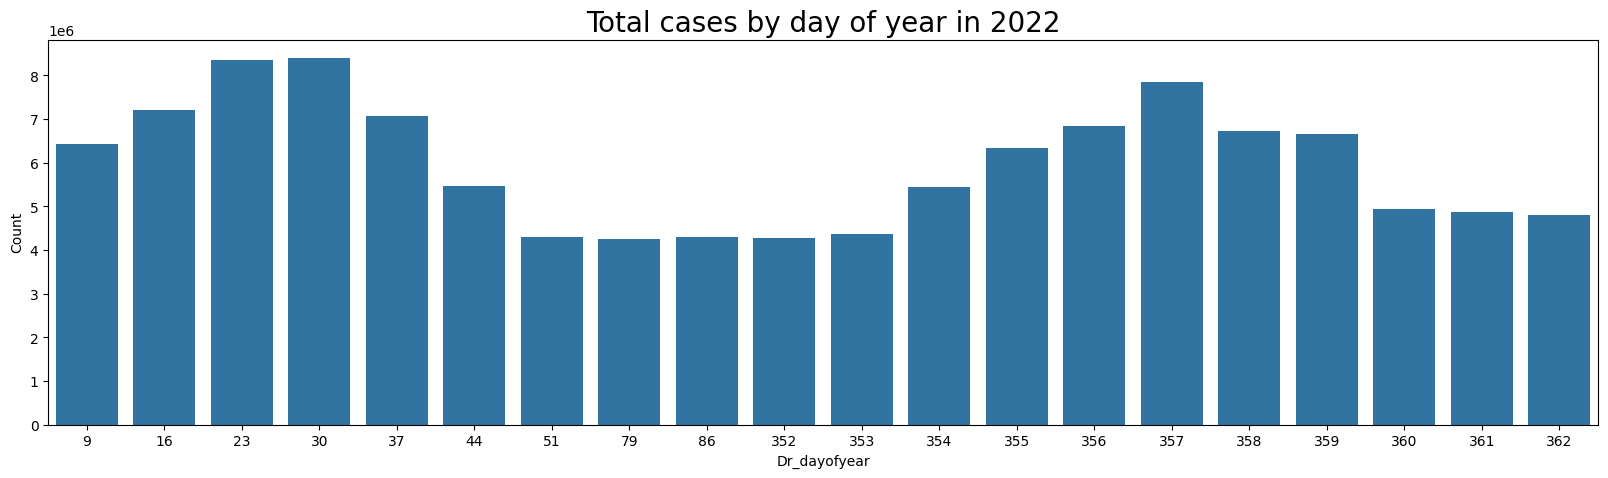

In [56]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x=df_2022_doy_c_sorted_20['Dr_dayofyear'], y=df_2022_doy_c_sorted_20['Count'])
plt.title('Total cases by day of year in 2022', fontsize=20);

The highest cases of 2022 falls in 30th of January, 2022 with 8.4M cases.

<a id="chapter_4_8"></a>
### 4.8 A Little Exploring (Cases)

In [57]:
df_20220130 = df_2022[(df_2022.Dr_year == 2022) & (df_2022.Dr_month == 1) & (df_2022.Dr_dayofyear == 30)]
df_20220130.head(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Dr_year,Dr_month,Dr_month_name,Dr_month_name_slice,Dr_day,Dr_day_name,Dr_dayofyear,Dr_week,Dr_quarter
223440,2022-01-30,TN,Tunisia,EMRO,7859.0,901107,59.0,26229,2022,1,January,Jan,30,Sunday,30,2022-W04,2022-Q1
223441,2022-01-30,ML,Mali,AFRO,25.0,30008,0.0,711,2022,1,January,Jan,30,Sunday,30,2022-W04,2022-Q1
223442,2022-01-30,MR,Mauritania,AFRO,88.0,58129,4.0,949,2022,1,January,Jan,30,Sunday,30,2022-W04,2022-Q1


In [58]:
df_20220130.describe(include='all')

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Dr_year,Dr_month,Dr_month_name,Dr_month_name_slice,Dr_day,Dr_day_name,Dr_dayofyear,Dr_week,Dr_quarter
count,240,240,240,240,1.940000e+02,2.400000e+02,194.000000,240.000000,240.0,240.0,240,240,240.0,240,240.0,240,240
unique,NaN,240,240,7,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,1,NaN,1,1
top,NaN,TN,Tunisia,EURO,NaN,NaN,NaN,NaN,NaN,NaN,January,Jan,NaN,Sunday,NaN,2022-W04,2022-Q1
freq,NaN,1,1,62,NaN,NaN,NaN,NaN,NaN,NaN,240,240,NaN,240,NaN,240,240
mean,2022-01-30 00:00:00,NaN,NaN,NaN,4.330909e+04,1.563786e+06,90.561856,23813.070833,2022.0,1.0,NaN,NaN,30.0,NaN,30.0,NaN,NaN
min,2022-01-30 00:00:00,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,2022.0,1.0,NaN,NaN,30.0,NaN,30.0,NaN,NaN
25%,2022-01-30 00:00:00,NaN,NaN,NaN,5.700000e+01,1.350600e+04,0.000000,120.500000,2022.0,1.0,NaN,NaN,30.0,NaN,30.0,NaN,NaN
50%,2022-01-30 00:00:00,NaN,NaN,NaN,1.420500e+03,1.077715e+05,4.000000,1306.500000,2022.0,1.0,NaN,NaN,30.0,NaN,30.0,NaN,NaN
75%,2022-01-30 00:00:00,NaN,NaN,NaN,1.056100e+04,7.458428e+05,24.000000,9093.750000,2022.0,1.0,NaN,NaN,30.0,NaN,30.0,NaN,NaN
max,2022-01-30 00:00:00,NaN,NaN,NaN,2.329374e+06,7.375688e+07,3604.000000,882540.000000,2022.0,1.0,NaN,NaN,30.0,NaN,30.0,NaN,NaN


In [59]:
df_20220130['Country'].describe()

count         240
unique        240
top       Tunisia
freq            1
Name: Country, dtype: object

In [60]:
np.mean(df_20220130['New_cases'])

43309.08762886598

In [61]:
np.median(df_20220130['New_cases'])

nan

In [62]:
np.min(df_20220130['New_cases'])

0.0

In [63]:
np.max(df_20220130['New_cases'])

2329374.0

In [64]:
np.std(df_20220130['New_cases'])

200821.38016354557

<Axes: >

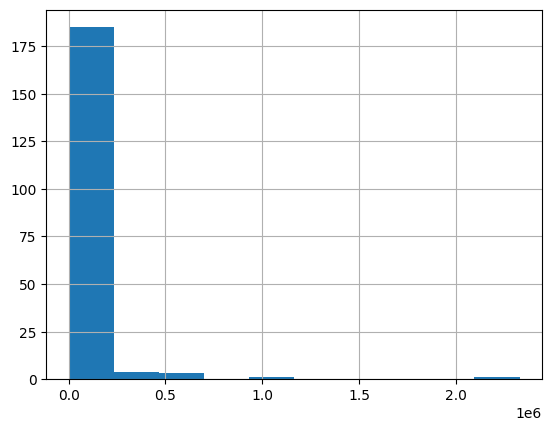

In [65]:
df_20220130['New_cases'].hist()

<Axes: >

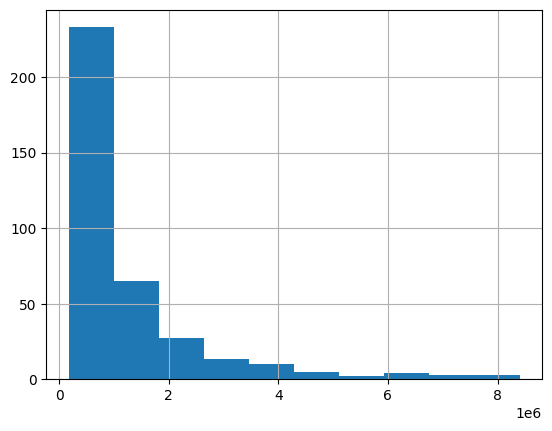

In [66]:
df_2022_doy_c['Count'].hist()

<a id="chapter_4_9"></a>
### 4.9 Total deaths by day of year

In [67]:
# Death
df_2021 = df[df['Dr_year'] == 2021]
df_2021.head(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Dr_year,Dr_month,Dr_month_name,Dr_month_name_slice,Dr_day,Dr_day_name,Dr_dayofyear,Dr_week,Dr_quarter
230640,2021-12-31,TN,Tunisia,EMRO,1162.0,725842,8.0,25564,2021,12,December,Dec,31,Friday,365,2021-W52,2021-Q4
230641,2021-12-31,UA,Ukraine,EURO,NaN,3606084,NaN,92533,2021,12,December,Dec,31,Friday,365,2021-W52,2021-Q4
230642,2021-12-31,TT,Trinidad and Tobago,AMRO,465.0,90829,16.0,2825,2021,12,December,Dec,31,Friday,365,2021-W52,2021-Q4


In [68]:
df_2021.shape

(87600, 17)

In [69]:
df_2021_doy_d = df_2021.groupby(by=['Dr_dayofyear'])['New_deaths'].sum().reset_index(name='Count')
df_2021_doy_d['Count_formatted'] = df_2021_doy_d['Count'].div(1000000).round(1).astype(str) + 'M'
df_2021_doy_d_sorted = df_2021_doy_d.sort_values(by='Count', ascending=False).reset_index(drop=True)
df_2021_doy_d_sorted_20 = df_2021_doy_d_sorted.head(20)
df_2021_doy_d_sorted_20

,Dr_dayofyear,Count,Count_formatted
0,24,27939.0,0.0M
1,17,26732.0,0.0M
2,10,25951.0,0.0M
3,31,25898.0,0.0M
4,3,23455.0,0.0M
5,38,23250.0,0.0M
6,45,21839.0,0.0M
7,115,20797.0,0.0M
8,108,20068.0,0.0M
9,101,19955.0,0.0M


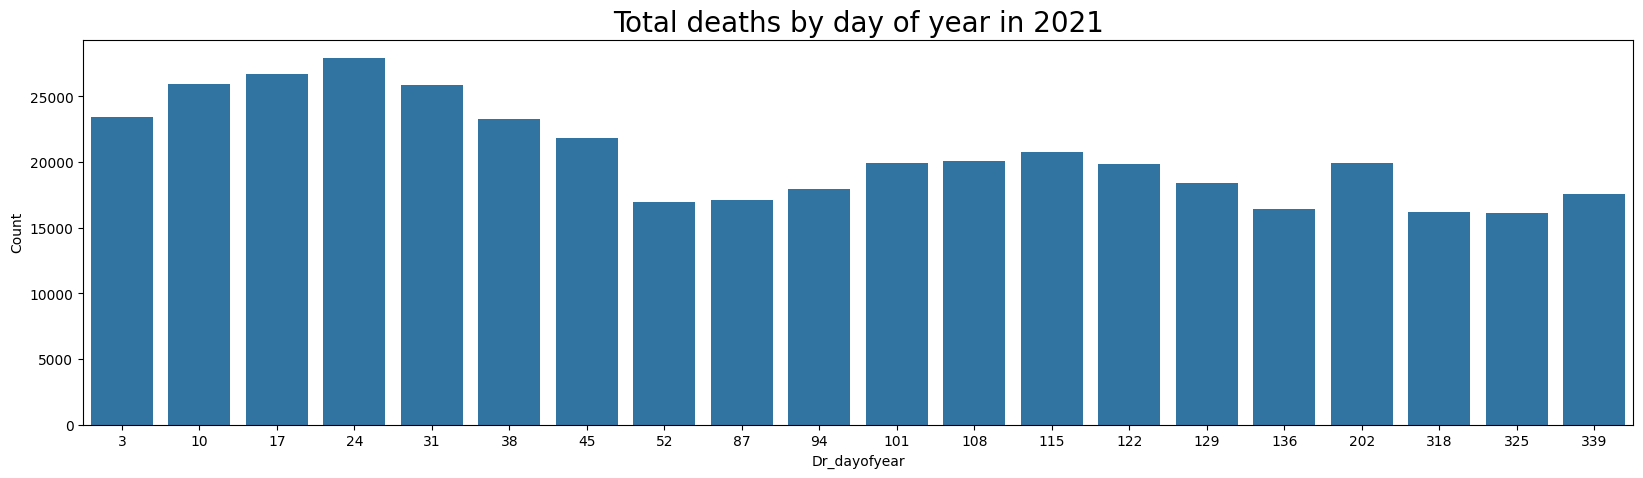

In [70]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x=df_2021_doy_d_sorted_20['Dr_dayofyear'], y=df_2021_doy_d_sorted_20['Count'])
plt.title('Total deaths by day of year in 2021', fontsize=20);

The highest deaths of 2021 falls in 24th of January, 2021 with 27939 deaths.

<a id="chapter_4_10"></a>
### 4.10 A Little Exploring (Deaths)

In [71]:
df_20210124 = df_2021[(df_2021.Dr_year == 2021) & (df_2021.Dr_month == 1) & (df_2021.Dr_dayofyear == 24)]
df_20210124.head(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Dr_year,Dr_month,Dr_month_name,Dr_month_name_slice,Dr_day,Dr_day_name,Dr_dayofyear,Dr_week,Dr_quarter
312480,2021-01-24,AZ,Azerbaijan,EURO,280.0,228526,11.0,3064,2021,1,January,Jan,24,Sunday,24,2021-W03,2021-Q1
312481,2021-01-24,BB,Barbados,AMRO,NaN,1341,NaN,9,2021,1,January,Jan,24,Sunday,24,2021-W03,2021-Q1
312482,2021-01-24,BD,Bangladesh,SEARO,473.0,531799,20.0,8023,2021,1,January,Jan,24,Sunday,24,2021-W03,2021-Q1


In [72]:
df_20210124.describe(include='all')

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Dr_year,Dr_month,Dr_month_name,Dr_month_name_slice,Dr_day,Dr_day_name,Dr_dayofyear,Dr_week,Dr_quarter
count,240,240,240,240,192.000000,2.400000e+02,194.000000,240.000000,240.0,240.0,240,240,240.0,240,240.0,240,240
unique,NaN,240,240,7,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,1,NaN,1,1
top,NaN,AZ,Azerbaijan,EURO,NaN,NaN,NaN,NaN,NaN,NaN,January,Jan,NaN,Sunday,NaN,2021-W03,2021-Q1
freq,NaN,1,1,62,NaN,NaN,NaN,NaN,NaN,NaN,240,240,NaN,240,NaN,240,240
mean,2021-01-24 00:00:00,NaN,NaN,NaN,6016.427083,4.110479e+05,144.015464,9503.633333,2021.0,1.0,NaN,NaN,24.0,NaN,24.0,NaN,NaN
min,2021-01-24 00:00:00,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000,0.000000,2021.0,1.0,NaN,NaN,24.0,NaN,24.0,NaN,NaN
25%,2021-01-24 00:00:00,NaN,NaN,NaN,15.750000,1.182750e+03,0.000000,11.500000,2021.0,1.0,NaN,NaN,24.0,NaN,24.0,NaN,NaN
50%,2021-01-24 00:00:00,NaN,NaN,NaN,248.000000,1.532850e+04,4.500000,217.000000,2021.0,1.0,NaN,NaN,24.0,NaN,24.0,NaN,NaN
75%,2021-01-24 00:00:00,NaN,NaN,NaN,1701.500000,1.754472e+05,33.000000,3043.000000,2021.0,1.0,NaN,NaN,24.0,NaN,24.0,NaN,NaN
max,2021-01-24 00:00:00,NaN,NaN,NaN,244667.000000,2.479441e+07,4107.000000,429874.000000,2021.0,1.0,NaN,NaN,24.0,NaN,24.0,NaN,NaN


In [73]:
df_20210124['Country'].describe()

count            240
unique           240
top       Azerbaijan
freq               1
Name: Country, dtype: object

In [74]:
np.mean(df_20210124['New_deaths'])

144.01546391752578

In [75]:
np.median(df_20210124['New_deaths'])

nan

In [76]:
np.min(df_20210124['New_deaths'])

0.0

In [77]:
np.max(df_20210124['New_deaths'])

4107.0

In [78]:
np.std(df_20210124['New_deaths'])

557.9210995912546

<Axes: >

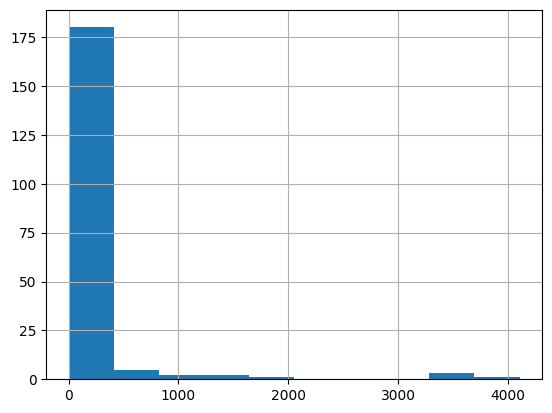

In [79]:
df_20210124['New_deaths'].hist()

<Axes: >

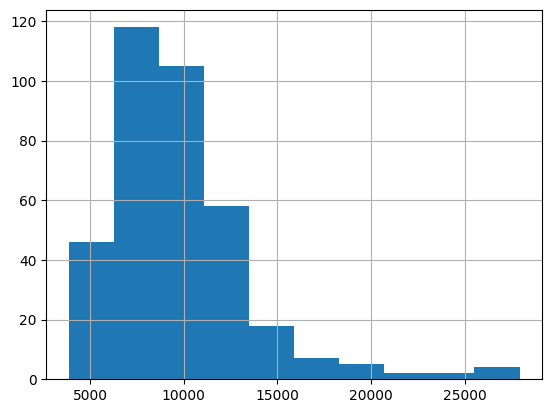

In [80]:
df_2021_doy_d['Count'].hist()

<a id="chapter_5"></a>
## 5. Correlation

<a id="chapter_5_1"></a>
### 5.1 Correlation between New_cases and New_deaths

<a id="chapter_5_1_1"></a>
#### 5.1.1 2021

In [81]:
df_2021_c = df_2021.copy()

df_2021_c = df_2021_c.drop(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'Cumulative_cases',
                'Cumulative_deaths', 'Dr_year', 'Dr_month', 'Dr_month_name', 'Dr_month_name_slice',
                'Dr_day', 'Dr_day_name', 'Dr_dayofyear', 'Dr_week', 'Dr_quarter'
               ], axis=1)

df_2021_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87600 entries, 230640 to 318239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   New_cases   66230 non-null  float64
 1   New_deaths  66595 non-null  float64
dtypes: float64(2)
memory usage: 2.0 MB


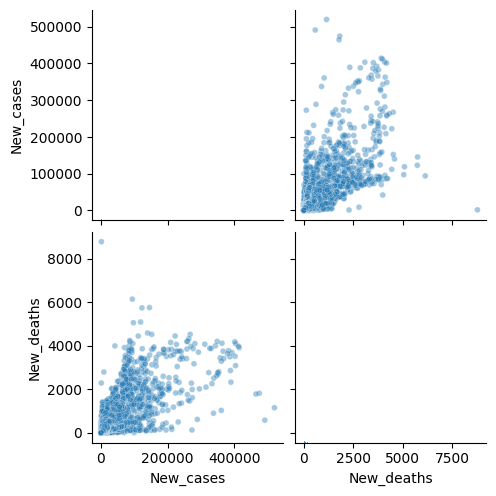

In [82]:
sns.pairplot(df_2021_c[['New_cases', 'New_deaths']],
             plot_kws={'alpha':0.4, 'size':10},
             );

In [83]:
df_2021_c.corr(method='pearson')

,New_cases,New_deaths
New_cases,1.000000,0.769975
New_deaths,0.769975,1.000000


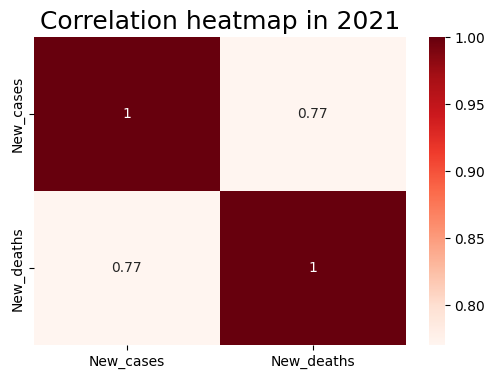

In [84]:
plt.figure(figsize=(6,4))
sns.heatmap(df_2021_c.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap in 2021', fontsize=18)
plt.show()

(0.0, 9225.6)

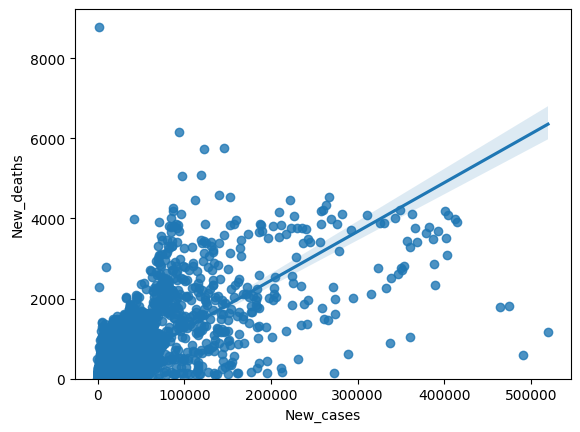

In [85]:
sns.regplot(x="New_cases", y="New_deaths", data=df_2021_c)
plt.ylim(0,)

<a id="chapter_5_1_2"></a>
#### 5.1.2 2022 

In [86]:
df_2022_c = df_2022.copy()

df_2022_c = df_2022_c.drop(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'Cumulative_cases',
                'Cumulative_deaths', 'Dr_year', 'Dr_month', 'Dr_month_name', 'Dr_month_name_slice',
                'Dr_day', 'Dr_day_name', 'Dr_dayofyear', 'Dr_week', 'Dr_quarter'
               ], axis=1)

df_2022_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87600 entries, 143040 to 230639
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   New_cases   53551 non-null  float64
 1   New_deaths  53723 non-null  float64
dtypes: float64(2)
memory usage: 2.0 MB


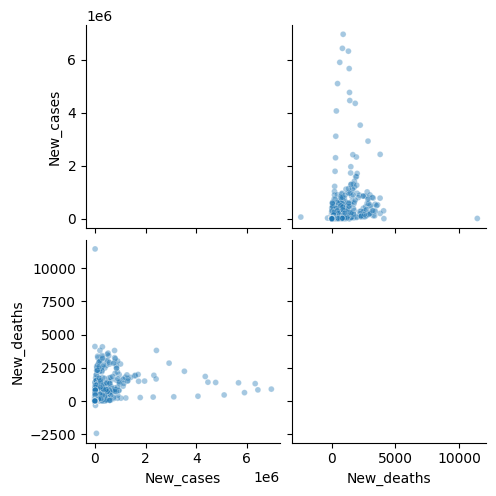

In [87]:
sns.pairplot(df_2022_c[['New_cases', 'New_deaths']],
             plot_kws={'alpha':0.4, 'size':10},
             );

In [88]:
df_2022_c.corr(method='pearson')

,New_cases,New_deaths
New_cases,1.000000,0.400371
New_deaths,0.400371,1.000000


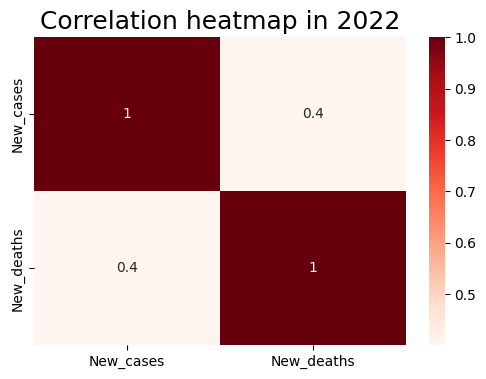

In [89]:
plt.figure(figsize=(6,4))
sns.heatmap(df_2022_c.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap in 2022', fontsize=18)
plt.show()

(0.0, 12141.2)

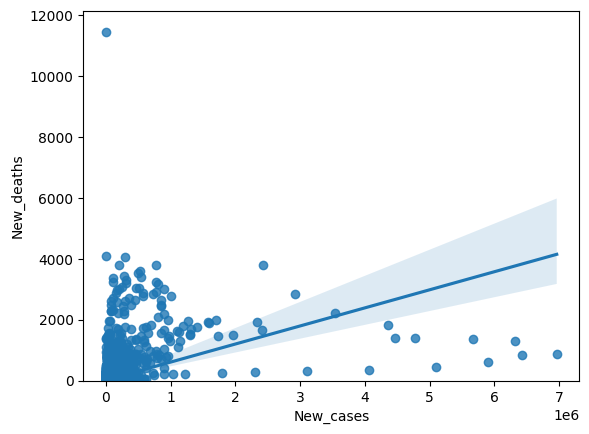

In [90]:
sns.regplot(x="New_cases", y="New_deaths", data=df_2022_c)
plt.ylim(0,)

<a href="chapter_5_1_3"></a>
#### 5.1.3 2023

In [91]:
df_2023 = df[df['Dr_year'] == 2023]
df_2023_c = df_2023.copy()

df_2023_c = df_2023_c.drop(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'Cumulative_cases',
                'Cumulative_deaths', 'Dr_year', 'Dr_month', 'Dr_month_name', 'Dr_month_name_slice',
                'Dr_day', 'Dr_day_name', 'Dr_dayofyear', 'Dr_week', 'Dr_quarter'
               ], axis=1)

df_2023_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87600 entries, 55440 to 143039
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   New_cases   27634 non-null  float64
 1   New_deaths  27721 non-null  float64
dtypes: float64(2)
memory usage: 2.0 MB


In [92]:
df_2023_c.corr(method='pearson')

,New_cases,New_deaths
New_cases,1.000000,0.216273
New_deaths,0.216273,1.000000


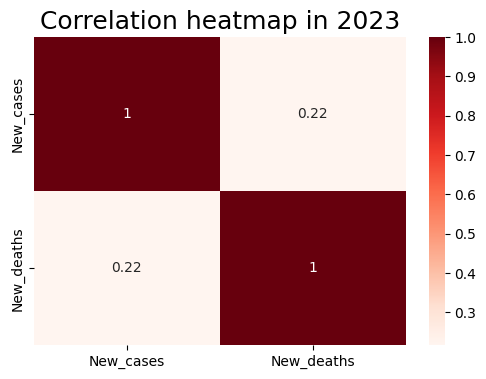

In [93]:
plt.figure(figsize=(6,4))
sns.heatmap(df_2023_c.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap in 2023', fontsize=18)
plt.show()

(0.0, 46425.35)

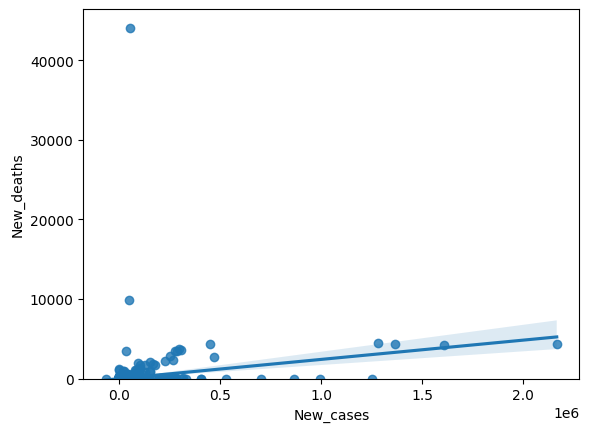

In [94]:
sns.regplot(x="New_cases", y="New_deaths", data=df_2023_c)
plt.ylim(0,)

<a id="chapter_5_1_4"></a>
#### 5.1.4 The whole dataframe

In [95]:
df_c = df.copy()

df_c = df_c.drop(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'Cumulative_cases',
                'Cumulative_deaths', 'Dr_year', 'Dr_month', 'Dr_month_name', 'Dr_month_name_slice',
                'Dr_day', 'Dr_day_name', 'Dr_dayofyear', 'Dr_week', 'Dr_quarter'
               ], axis=1)

df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405360 entries, 0 to 405359
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   New_cases   205625 non-null  float64
 1   New_deaths  206542 non-null  float64
dtypes: float64(2)
memory usage: 6.2 MB


In [96]:
df_c.corr(method='pearson')

,New_cases,New_deaths
New_cases,1.000000,0.271002
New_deaths,0.271002,1.000000


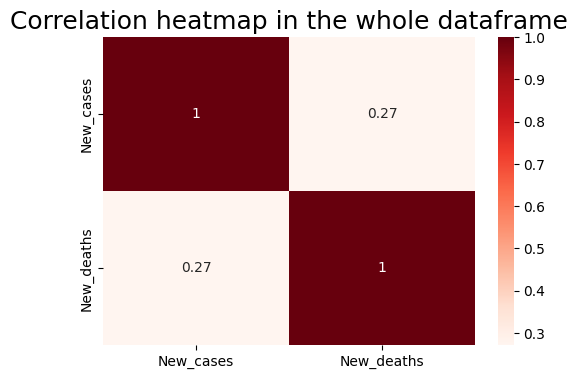

In [97]:
plt.figure(figsize=(6,4))
sns.heatmap(df_c.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap in the whole dataframe', fontsize=18)
plt.show()

(0.0, 46425.35)

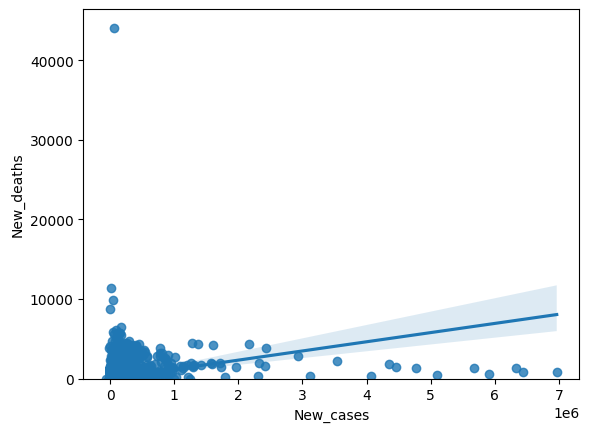

In [98]:
sns.regplot(x="New_cases", y="New_deaths", data=df)
plt.ylim(0,)

<a id="chapter_6"></a>
## 6. Hypothesis testing

In Correlation section, there's a weak correlation between New_cases and New_deaths in the whole dataset. But there's a somewhat strong correlation with 0.77 in 2021 between New_cases and New_deaths. So let's assume I used the 2021 data to create a hypothesis about those variables.

Hypotheses:</br>
Null = The increase of New_deaths are **not** caused by New_cases</br>
Alternative = The increase of New_deaths are caused by New_cases

In [99]:
# Import stats from scipy
from scipy import stats

In [100]:
# I used the copy of 2021's dataframe
df_2021_c.describe()

,New_cases,New_deaths
count,66230.000000,66595.000000
mean,3066.755881,53.117471
std,15413.494124,243.476985
min,-875.000000,-6.000000
25%,13.000000,0.000000
50%,155.000000,2.000000
75%,1130.000000,16.000000
max,519740.000000,8786.000000


In [101]:
# I want to know many rows and columns the dataframe had
df_2021_c.shape

(87600, 2)

In [102]:
# Are there any null value in the dataframe?
df_2021_c.isna().sum()

New_cases     21370
New_deaths    21005
dtype: int64

In [103]:
# Drop any null value
df_2021_c = df_2021_c.dropna(axis=0)

In [104]:
# Check again
df_2021_c.isna().sum()

New_cases     0
New_deaths    0
dtype: int64

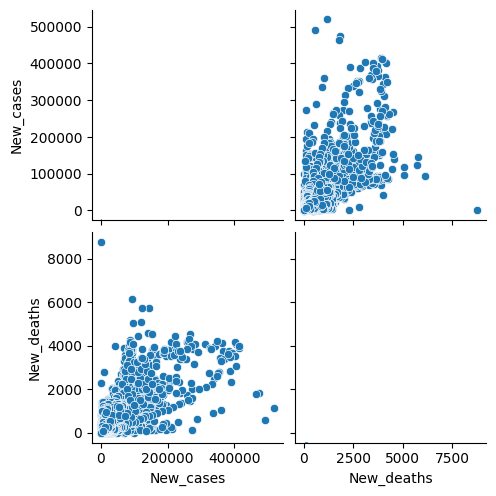

In [105]:
# Create a pair plot
sns.pairplot(df_2021_c)

In [106]:
# Pearson Correlation Coefficient
pearson_coef, p_value = stats.pearsonr(df_2021_c['New_cases'], df_2021_c['New_deaths'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7699751706578913 with a P-value of P = 0.0


In [107]:
significance_level = 0.05
stats.ttest_ind(a=df_2021_c['New_cases'], b=df_2021_c['New_deaths'], equal_var=False)

TtestResult(statistic=50.306645160289, pvalue=0.0, df=66262.2267074061)

In [108]:
v_null = "The increase of New_deaths are not caused by New_cases"
v_alternative = "The increase of New_deaths are caused by New_cases"

if (p_value < significance_level):
    print("Reject the null hypothesis")
    print(v_alternative)
else:
    print("Fail to reject the null hypothesis")
    print(v_null)

Reject the null hypothesis
The increase of New_deaths are caused by New_cases


In [109]:
#df.to_excel('covid-19_1.xlsx', sheet_name='covid', index=False)

<a id="chapter_7"></a>
## 7. Summary

In conclusion, in this notebook all I did was to explore and analyze the Covid-19 data from WHO. From handling missing values in the dataset to do hypothesis testing to know if the increase of New_deaths caused by New_cases or not. Turns out, in 2021 (the year with the highest death) according to my testing is indeed caused by New_cases.